In [32]:
import numpy as np
import pandas as pd
import pickle 

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

# import here in this order otherwise crashes the kernel, 
# something wrong with shapely and pysal, 
# shapely needs to be imported before pysal? 
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon

import sys
sys.path.append('../')
import scripts.outliers as outliers
import scripts.utils as utils
import scripts.interactive_plot as interactive_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
DATA_FILE = '../data/lda_data_melodia_8_30sec.pickle'
METADATA_FILE = '/Users/mariapanteli/Documents/QMUL/Code/MyPythonCode/MergeBL-Smith/data/metadata_BLSM_language_all.csv'
#METADATA_FILE = '../data/metadata.csv'

dataset, ddf, w_dict = outliers.load_data(DATA_FILE, METADATA_FILE)

Island ids:  [3, 6, 26, 35, 39, 45, 52, 61, 62, 66, 77, 85, 94, 97, 98, 102, 103, 107, 110, 120, 121]
Antigua and Barbuda
Australia
Cuba
Fiji
French Polynesia
Grenada
Iceland
Jamaica
Japan
Kiribati
Malta
New Zealand
Philippines
Puerto Rico
Republic of Serbia
Saint Lucia
Samoa
Solomon Islands
South Korea
The Bahamas
Trinidad and Tobago


In [39]:
# correct BL urls:
bl_inds = np.where(np.isnan(ddf['BuyLinkTrackDownload']))[0]
for bl_ind in bl_inds:
    ddf['songurls_Album'].iloc[bl_ind] = ('https://sounds.bl.uk/World-and-traditional-music/' + 
                                        ddf['Folder'].iloc[bl_ind] + '/' + 
                                        ddf['MetaFile'].iloc[bl_ind].split('.')[0])

/Users/mariapanteli/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
X_list, Y, Yaudio = dataset
X = np.concatenate(X_list, axis=1)
ddf.shape

(8200, 109)

most outliers 
           Country  Outliers  N_Country  N_Outliers
136       Botswana  0.611111         90          55
72     Ivory Coast  0.600000         15           9
95            Chad  0.545455         11           6
43           Benin  0.538462         26          14
86          Gambia  0.500000         50          25
20        Pakistan  0.494505         91          45
106          Nepal  0.473684         95          45
78     El Salvador  0.454545         33          15
64      Mozambique  0.441176         34          15
135  French Guiana  0.428571         28          12
least outliers 
            Country  Outliers  N_Country  N_Outliers
1         Lithuania  0.000000         47           0
119         Denmark  0.000000         16           0
27      South Korea  0.000000         11           0
120      Kazakhstan  0.011364         88           1
31   Czech Republic  0.024390         41           1
15      Netherlands  0.029851         67           2
30      Afghanistan  0.041

TypeError: unhashable type: 'list'

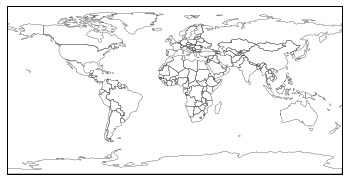

In [43]:
# global outliers
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999, out_file='../data/results/global_outliers.csv')
outliers.print_most_least_outliers_topN(df_global, N=10)
tab_all = interactive_plot.plot_outliers_world_figure(MD, MD>threshold, ddf)
print "n outliers " + str(len(np.where(MD>threshold)[0]))

In [8]:
# local outliers
df_local = outliers.get_local_outliers_df(X, Y, w_dict, out_file='../data/results/spatial_outliers.csv')
outliers.print_most_least_outliers_topN(df_local, N=10)

328
210
194
85
388
266
309
455
365
282
197
122
206
457
298
597
354
191
193
198
263
334
812
415
44
107
366
323
450
116
150
260
230
118
389
237
274
466
147
134
86
91
574
111
296
221
261
224
190
150
139
350
268
453
192
468
266
187
275
337
179
366
211
213
428
468
164
348
328
193
197
193
166
290
196
224
111
258
295
227
252
433
305
290
183
243
63
197
274
363
113
192
258
494
299
484
198
191
174
280
735
211
221
134
125
119
151
203
229
430
311
424
337
268
175
228
175
437
284
129
366
222
66
498
400
430
187
470
298
231
272
261
239
154
22
426
332
most outliers 
         Country  Outliers  N_Country  N_Outliers
46         China  0.260000        100          26
67        Brazil  0.240000        100          24
101     Colombia  0.211111         90          19
64    Mozambique  0.205882         34           7
76          Iran  0.188679         53          10
65        Uganda  0.176471         85          15
27         Kenya  0.164948         97          16
126  South Sudan  0.163043         92       

most outliers 
      Country  Outliers  N_Country  N_Outliers
43      Benin  0.500000         26          13
136  Botswana  0.488889         90          44
106     Nepal  0.421053         95          40
84     Belize  0.418605         43          18
19      Yemen  0.416667         12           5
least outliers 
                Country  Outliers  N_Country  N_Outliers
28           Tajikistan         0         19           0
119             Denmark         0         16           0
96              Uruguay         0         31           0
25   Republic of Serbia         0         16           0
27          South Korea         0         11           0
most outliers 
      Country  Outliers  N_Country  N_Outliers
117  Zimbabwe  0.533333         15           8
96    Uruguay  0.483871         31          15
68     Guinea  0.454545         11           5
63    Senegal  0.390244         41          16
86     Gambia  0.380000         50          19
least outliers 
              Country  Outliers 

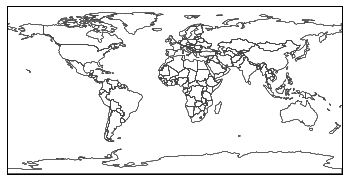

In [41]:
# outliers for features
feat = X_list
feat_labels = ['rhy', 'mel', 'mfc', 'chr']
tabs_feat = []
for i in range(len(feat)):
    XX = feat[i]
    output_csv = '../data/results/global_outliers_'+feat_labels[i]+'.csv'
    df_feat, threshold, MD = outliers.get_outliers_df(XX, Y, chi2thr=0.999, out_file=output_csv)
    outliers.print_most_least_outliers_topN(df_feat, N=5)
    tabs_feat.append(interactive_plot.plot_outliers_world_figure(MD, MD>threshold, ddf))

In [42]:
interactive_plot.plot_tabs(tab_all, tabs_feat, out_file="../data/results/outliers.html")

In [22]:
centroids, cl_pred = outliers.get_country_clusters(X, bestncl=None, min_ncl=10, max_ncl=30)
ddf['Clusters'] = cl_pred
print len(np.unique(cl_pred))
outliers.print_clusters_metadata(ddf, cl_pred, out_file='../data/results/clusters_top3_countries.csv')

\begin{tabular}{llll}
\toprule
{} &                  0 &                          1 &                      2 \\
\midrule
0 &    (Swaziland, 12) &                (Ghana, 13) &         (Botswana, 21) \\
1 &     (Pakistan, 17) &              (Ireland, 21) &            (Nepal, 32) \\
2 &     (Pakistan, 35) &               (Turkey, 41) &             (Iraq, 57) \\
3 &     (Portugal, 29) &          (Switzerland, 32) &          (Austria, 53) \\
4 &        (Nepal, 22) &                 (Cuba, 24) &           (Zambia, 32) \\
5 &  (South Sudan, 36) &         (Sierra Leone, 37) &          (Lesotho, 45) \\
6 &       (Mexico, 40) &  (Trinidad and Tobago, 53) &       (Kazakhstan, 67) \\
7 &        (Japan, 34) &            (Australia, 46) &  (Solomon Islands, 54) \\
8 &  (South Sudan, 56) &               (Canada, 59) &           (Norway, 62) \\
9 &       (Russia, 34) &             (Portugal, 38) &          (Ukraine, 48) \\
\bottomrule
\end{tabular}



In [19]:
ddf.to_csv('../data/results/df_and_clusters.csv', index=False)
cluster_freq = utils.get_cluster_freq_linear(X, Y, centroids)
cluster_freq.to_csv('../data/results/cluster_freq.csv')

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


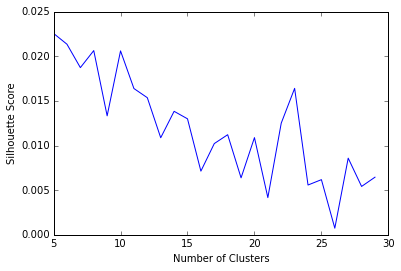

In [17]:
import scripts.utils as utils
bestncl, ave_silh = utils.best_n_clusters_silhouette(X, min_ncl=5, max_ncl=30, metric="cosine")
plt.plot(ave_silh)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')